In [2]:
!pip install shap

  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)


In [1]:
import joblib
import yaml

from churn_library import *

In [2]:
import os
os.environ['QT_QPA_PLATFORM']='offscreen'

In [3]:
# load config file
with open("config.yaml", "r") as stream:
    config = yaml.safe_load(stream)
    
cpl = ChurnPipeline(r"./data/bank_data.csv", config, split=0.3)

In [4]:
cpl.df.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn,Gender_Churn,Education_Level_Churn,Marital_Status_Churn,Income_Category_Churn,Card_Category_Churn
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,...,1144,42,1.625,0.061,0,0.146152,0.152012,0.151269,0.134807,0.160979
1,1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,...,1291,33,3.714,0.105,0,0.173572,0.155691,0.169414,0.171862,0.160979
2,2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,...,1887,20,2.333,0.000,0,0.146152,0.155691,0.151269,0.157655,0.160979
3,3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,...,1171,20,2.333,0.760,0,0.173572,0.152012,0.172230,0.171862,0.160979
4,4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,...,816,28,2.500,0.000,0,0.146152,0.159381,0.151269,0.134807,0.160979


## EDA

(10127, 28)
Unnamed: 0                  0
CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Churn                       0
Gender_Churn                0
Education_Level_Churn       0
Marital_Status_Churn        0
Income_Category_Churn       0
Card_Category_Churn         0
dtype: int64
         Unnamed: 0     CLIENTNUM  Customer_Age  Dependent_count  \
count  10127.000000  1.012700e+04  10127.000000     10127.000000   

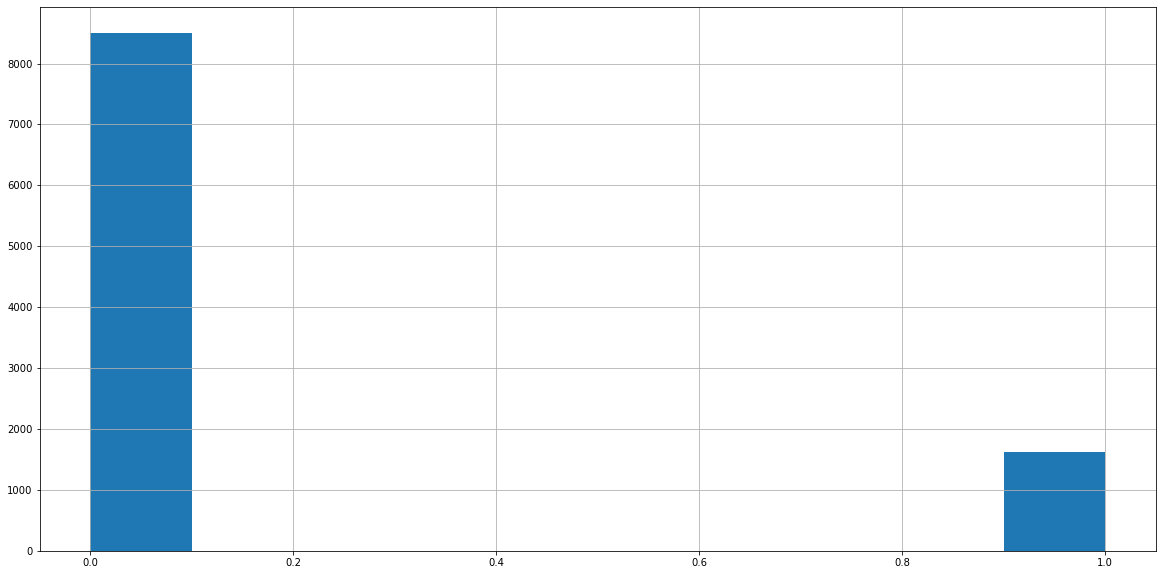

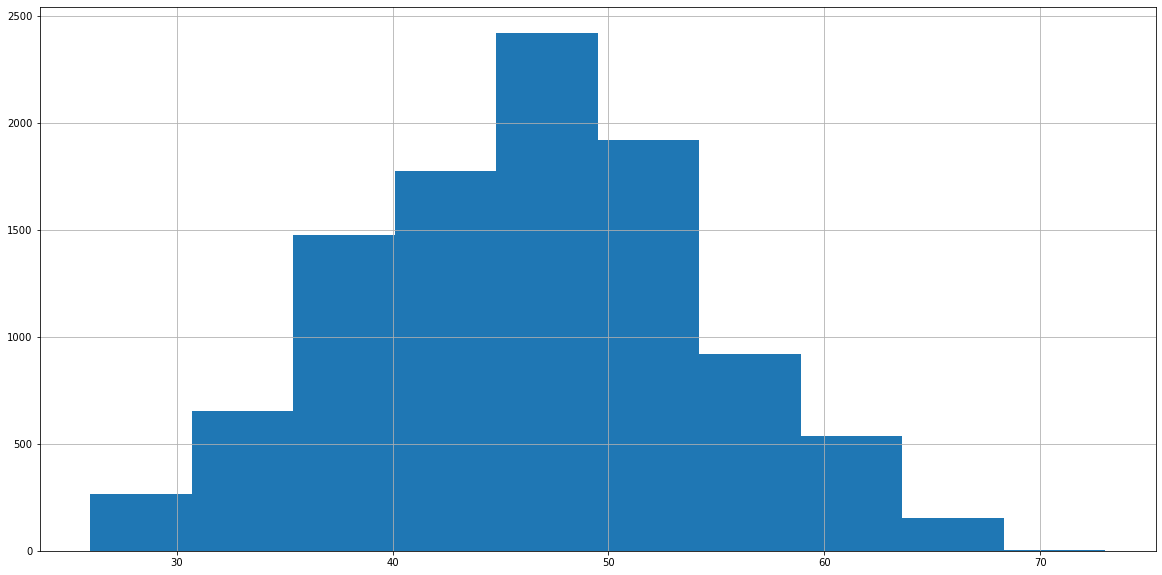

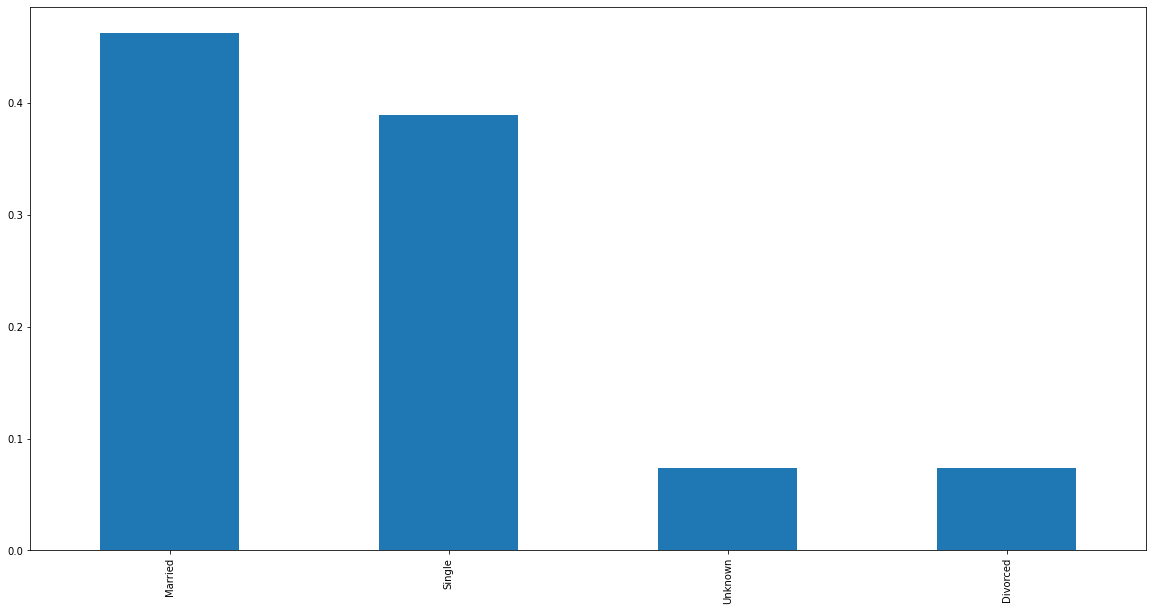

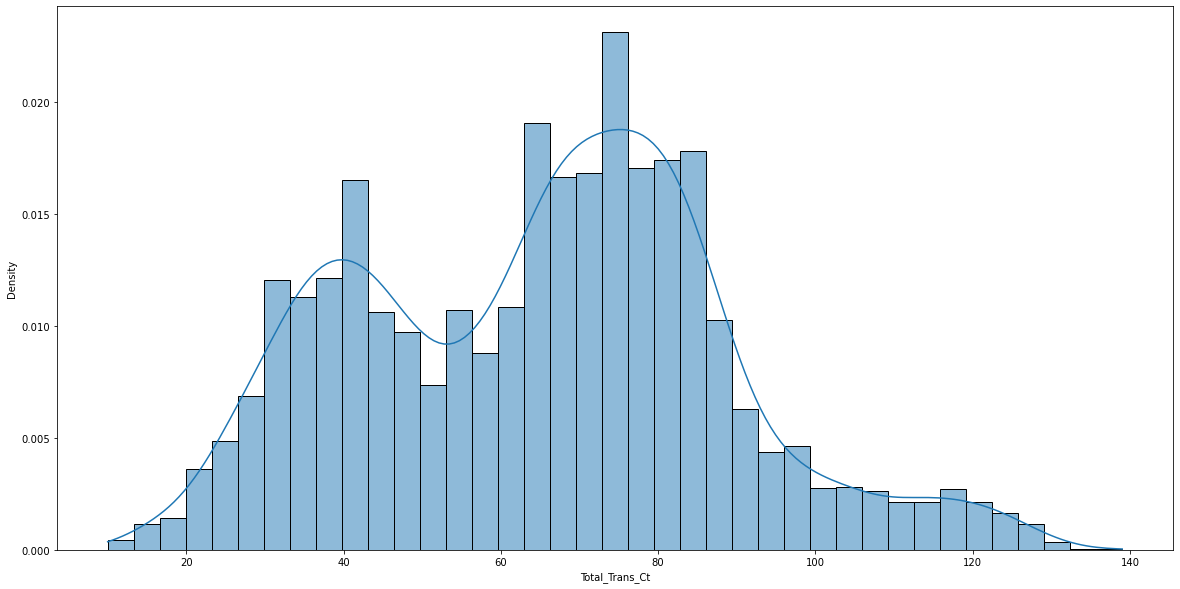

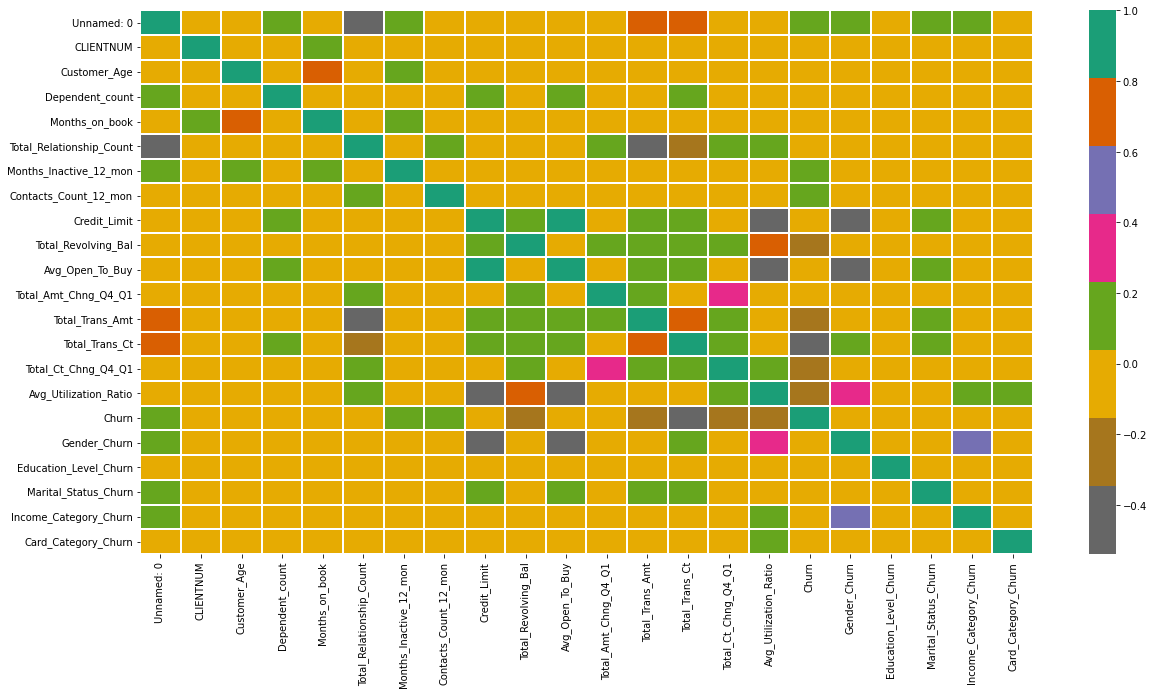

In [5]:
plot_dict = {'Churn': cpl.histogram,
             'Customer_Age':cpl.histogram,
             'Marital_Status': cpl.value_counts,
             'Total_Trans_Ct': cpl.distribution
            }

cpl.perform_eda(plot_dict)

## Train models

In [6]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,100],
    'criterion' :['gini', 'entropy']
}

cpl.train_models(param_grid)

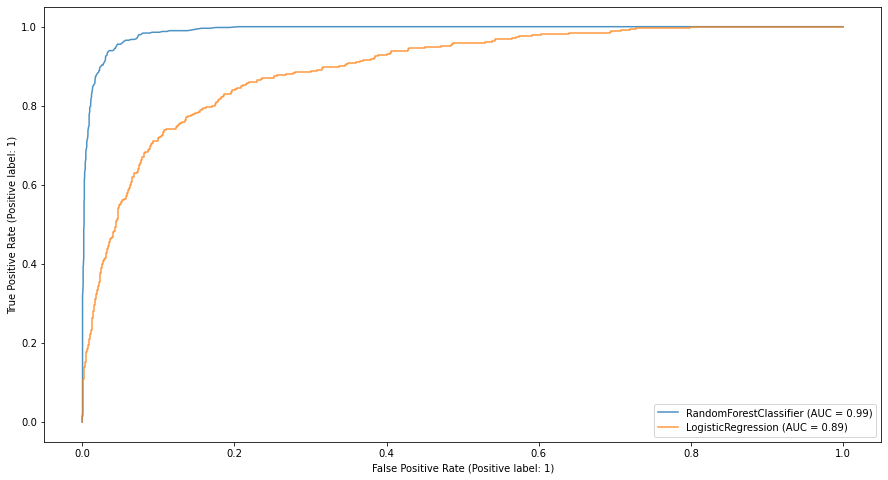

In [7]:
cpl.plot_roc_curves()

In [8]:
cpl.classification_report_image()

In [9]:
rfc_model = joblib.load('./models/rfc_model.pkl')

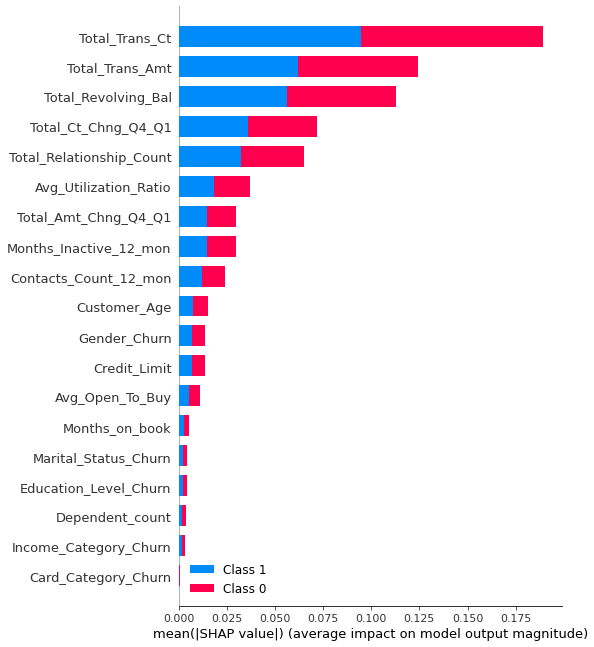

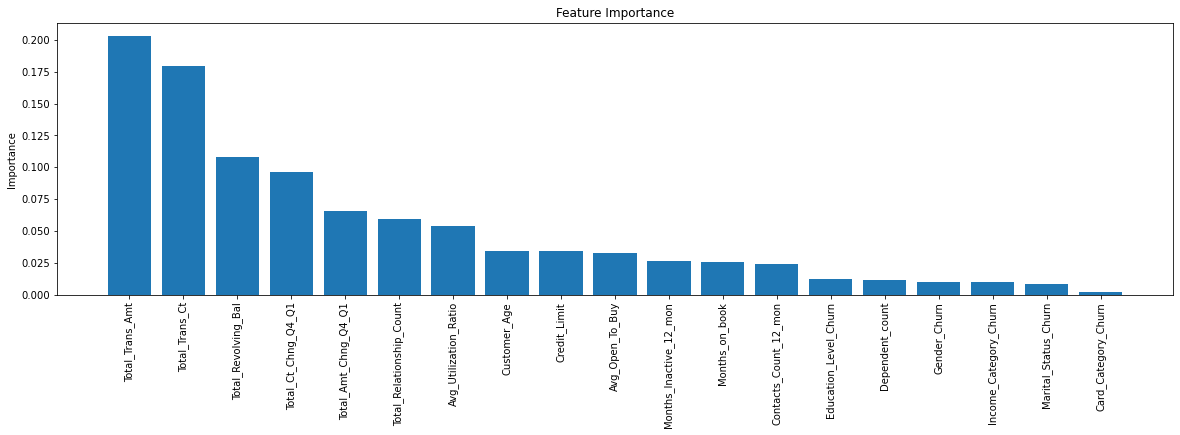

In [10]:
cpl.feature_importance_plot()